# Euler's Algorithm

In this tutorial, we will explore Euler's algorithm and its implementation in NetworkX under [`networkx/algorithms/euler.py`](https://github.com/networkx/networkx/blob/main/networkx/algorithms/euler.py).

## Import package

In [1]:
import networkx as nx

## Seven Bridges of Königsberg

What you are seeing below is the beautiful old town of Königsberg which is famous for its seven bridges. Each of these bridges either connect two large islands — Kneiphof and Lomse — or two mainland portions of the city.

![image:map](images/map.png)

What gave the town its fame is a question that was asked to mathematician Leonhard Euler almost 300 years ago [^1]:

> ***Can you take a walk through Königsberg visiting each mass by crossing each bridge once and only once?***

Euler's negative resolution to this question laid the foundations of graph theory. Before diving into Euler's solution, let's reformulate the problem.

### Reformulating the Problem in Abstract Terms

In order to have a clear look, we should first simplify the map a little.

![image:part1](images/part1.png)

Euler observed that the choice of route inside each land mass is irrelevant. The only thing that matters is the sequence of bridges to be crossed. This observation allows us to abstract the problem even more. In the graph below, blue vertices represent the land masses and edges represent the bridges that connect them.

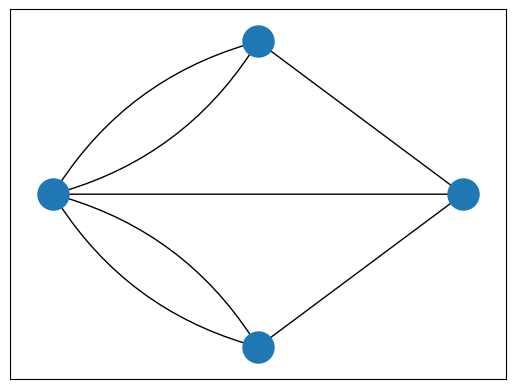

In [2]:
# Create graph
G = nx.DiGraph()
G.add_edge("A", "B", label="a")
G.add_edge("B", "A", label="b")
G.add_edge("A", "C", label="c")
G.add_edge("C", "A", label="d")
G.add_edge("A", "D", label="e")
G.add_edge("B", "D", label="f")
G.add_edge("C", "D", label="g")

positions = {"A": (0, 0), "B": (1, -2), "C": (1, 2), "D": (2, 0)}

# Visualize graph
nx.draw_networkx_nodes(G, pos=positions, node_size=500)
nx.draw_networkx_edges(
    G, pos=positions, edgelist=[("A", "D"), ("B", "D"), ("C", "D")], arrowstyle="-"
)
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=[("A", "B"), ("B", "A"), ("C", "A"), ("A", "C")],
    arrowstyle="-",
    connectionstyle="arc3,rad=0.2",
);

Based on this abstraction, we can paraphrase the problem as follows:

> ***Can you draw the above graph without lifting your pen or crossing on a line more than once?***

If you can, it means there is an ***Euler Path*** in the graph. If this path starts and ends at the same blue circle, it is called an ***Euler Circuit***. 

Note that every Euler Circuit is also an Euler Path.

### Euler's Method

Euler [^2] denoted land masses of the town by capital letters $A$, $B$, $C$ and $D$ and bridges by lowercase $a$, $b$, $c$, $d$, $e$, $f$ and $g$. Let's draw the graph based on this node and edge labels.

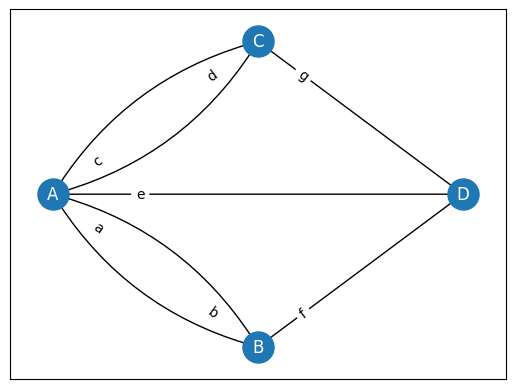

In [3]:
# Design and draw graph
edge_labels = nx.get_edge_attributes(G, "label")

nx.draw_networkx_nodes(G, pos=positions, node_size=500)
nx.draw_networkx_labels(G, pos=positions, font_color="w")
nx.draw_networkx_edges(
    G, pos=positions, edgelist=[("A", "D"), ("B", "D"), ("C", "D")], arrowstyle="-"
)
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=[("A", "B"), ("B", "A"), ("C", "A"), ("A", "C")],
    arrowstyle="-",
    connectionstyle="arc3,rad=0.2",
)
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, label_pos=0.2);

He described his logic as follows:
- If we cross bridge $a$, we walk from $A$ to $B$. In this case, our travel route is denoted as $AB$. 
- If we cross first $a$ and then $f$, our route will be $ABD$.
- So, sequential use of $n$ bridges is denoted with $n+1$ capital letters.
- Since we need to cross each of 7 bridges, our route should consist of a sequence of $A$, $B$, $C$ and $D$ of length 8.

He also stated the fact that number of appearances of each land mass in the route depend on the number of bridges it has.
- $A$ has 5 bridges. All these 5 bridges should appear in our Euler Path exactly once. Then, $A$ should appear in our route for 3 times.
- $B$ has 3 bridges. It should appear in the route for 2 times.
- $C$ has 3 bridges. It should appear in the route for 2 times.
- $D$ has 3 bridges. It should appear in the route for 2 times.
- Then, the total length of the route should be 3 + 2 + 2 + 2 = 9.

It is obvious that we cannot satisfy both of these conditions at the same time. Therefore, Euler concluded that there is no solution to Seven Bridges of Königsberg problem (I.e. Königsberg does not have an Euler Path). 

### Generalizing Euler's Solution

Euler generalized the method he applied for Königsberg problem as follows:

> ***A graph has an Euler Path if and only if the number of vertices with odd degree is either zero or two.***

- If there are two vertices with odd degree, then they are the starting and ending vertices.
- If there are no vertices with odd degree, any vertex can be starting or ending vertex and the graph has also an Euler Circuit.

## Euler's Algorithm in NetworkX

NetworkX implements several methods using the Euler's algorithm. These are:
- **is_eulerian**      : Whether the graph has an Eulerian circuit
- **eulerian_circuit** : Sequence of edges of an Eulerian circuit in the graph.
- **eulerize**         : Transforms a graph into an Eulerian graph
- **is_semieulerian**  : Whether the graph has an Eulerian path but not an Eulerian circuit.
- **has_eulerian_path**: Whether the graph has an Eulerian path.
- **eulerian_path**    : Sequence of edges of in Eulerian path in the graph.

In this part, we will briefly explain the NetworkX implementation of Euler's algorithm by explaining some of these methods.

**Note**: NetworkX implementation does not allow graphs with isolated nodes to have Eulerian Path and/or Eulerian Circuit. Thus, an Eulerian Path or Eulerian Circuit must visit not only all edges, but also all vertices of the graph.

### 1. Eulerian Circuit Implementation

Implementation of the `is_eulerian` method is quite simple. In order to have an Euler circuit (i.e. to be Eulerian):
- A directed graph must be strongly connected and every vertex of it must have equal in degree and out degree.
- An undirected graph must be connected, and it must have no vertices of odd degree.

Here is an example:

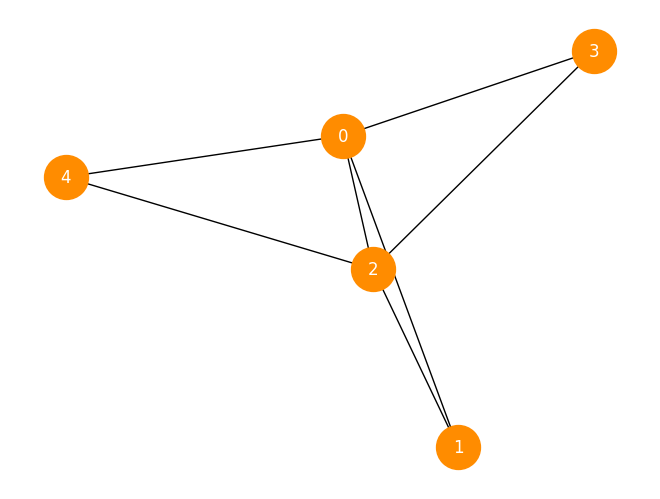

In [4]:
T = nx.Graph([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (2, 3), (2, 4)])
nx.draw(
    T, with_labels=True, node_size=1000, font_color="White", node_color="darkorange"
)

In [5]:
def is_eulerian(G):
    if G.is_directed():
        return all(
            G.in_degree(n) == G.out_degree(n) for n in G
        ) and nx.is_strongly_connected(G)
    else:
        return all(d % 2 == 0 for v, d in G.degree()) and nx.is_connected(G)

In [6]:
is_eulerian(T)

True

NetworkX has also implemented the `eulerian_circuit` method to determine sequence of edges that consist of a Euler Circuit.

The method uses a stack data structure to keep vertices, it starts with the source vertex and pushes into stack. At each following iteration, it pops a vertex from the stack, chooses a neighbor of it, pushes the chosen vertex to the stack and removes the chosen edge from the graph.

```python
circuit = []

if G.is_directed():
    degree = G.out_degree
    edges = G.out_edges
else:
    degree = G.degree
    edges = G.edges

vertex_stack = [0]
last_vertex = None
while vertex_stack:
    current_vertex = vertex_stack[-1]
    circuit.append(current_vertex)
    if G.degree(current_vertex) == 0:
        if last_vertex is not None:
            break
        last_vertex = current_vertex
        vertex_stack.pop()
    else:
        _, next_vertex = next(iter(G.edges(current_vertex)))
        vertex_stack.append(next_vertex)
        G.remove_edge(current_vertex, next_vertex)
```

### 2. Eulerian Path Implementation

Networkx implementation of `has_eulerian_path` first checks if the graph `is_eulerian` or not. Remember that if a graph is Eulerian (i.e. has Euler Circuit), then it also has Eulerian Path.

```python
def has_eulerian_path(G, source=None):
    if nx.is_eulerian(G):
        return True
```

If an undirected graph is not Eulerian, it can still be `semi_eulerian` meaning that it might have an Eulerian Path with different starting and ending vertices. As explained above, this is possible if and only if
- there are exactly two vertices of odd degree, and
- all of its vertices belong to a single connected component.

If source vertex is given by the user, it must have an odd degree. Otherwise, there cannot be an Eulerian Path starting from the given source.

```python
    if G.is_directed() == False:
        if source is not None and G.degree[source] % 2 != 1:
            return False
        return(sum(d % 2 == 1 for _, d in G.degree()) == 2 and nx.is_connected(G))
```

For a directed graph to has an Eulerian Path, it must have 
- at most one vertex has out_degree - in_degree = 1,
- at most one vertex has in_degree - out_degree = 1,
- every other vertex has equal in_degree and out_degree, and 
- all of its vertices belong to a single connected component of the underlying undirected graph *(I.e. Should be weakly connected)*.

```python
    if G.is_directed():
        ins = G.in_degree
        outs = G.out_degree
        if source is not None and outs[source] - ins[source] != 1:
            return False

        unbalanced_ins = 0
        unbalanced_outs = 0
        for v in G:
            if ins[v] - outs[v] == 1:
                unbalanced_ins += 1
            elif outs[v] - ins[v] == 1:
                unbalanced_outs += 1
            elif ins[v] != outs[v]:
                return False

        return (
            unbalanced_ins <= 1 and unbalanced_outs <= 1 and nx.is_weakly_connected(G)
        )
```

Using already implemented methods, ```is_semieulerian``` simply checks if the input graph does not have an Eulerian circuit but an Eulerian path with a one line of code.

In [7]:
def is_semieulerian(G):
    return has_eulerian_path(G) and not is_eulerian(G)

### 3. Examples

Let's call the methods above on the Seven Bridges problem. For the reasons explained above, we expect our graph to have neither an Eulerian Circuit nor an Eulerian Path.

In [8]:
nx.is_eulerian(G)

False

In [9]:
nx.has_eulerian_path(G)

False

We can conclude this section with another example. Do you expect a wheel graph to have an Eulerian Path?

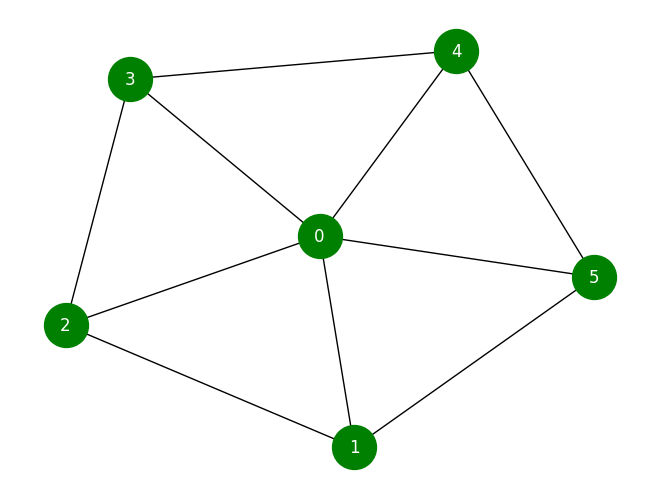

In [10]:
W = nx.wheel_graph(6)
nx.draw(W, with_labels=True, node_size=1000, font_color="White", node_color="green")

The answer is No! All nodes except for the one in the center have exactly 3 edges in the wheel graph. Thus, it cannot have an Eulerian Path.

In [11]:
nx.has_eulerian_path(W)

False

## Euler is everywhere!

Euler's algorithm is essential for anyone or anything that uses paths. Some examples of its real applications:
- To solve many complex problems, like the Konigsberg Seven Bridges Problem explained above.
- Mail carriers can use Eulerian Paths to have a route where they don’t have to retrace their previous steps.
- Useful for painters, garbage collections, airplane pilots, GPS developers (*e.g. Google Maps developers*).

## References

[^1]:  [Wikipedia, Seven Bridge of Konigsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg)

[^2]:  Euler, Leonhard, ‘Solutio problematis ad geometriam situs pertinentis’ (1741), Eneström 53, MAA Euler Archive.